# U.S. Medical Insurance Costs

For this project, I was tasked to investigate a medical insurance costs dataset in a .csv file using the Python skills I had developed so far in Codecademy Data Science Career path.

The goal of the task was for each student to complete an off-platform project, where we worked with actual information and performed our own independent analysis on real-world data. Unlike the on-platform projects, we were not provided step-by-step instructions on what to do, but a framework on how to structure our data exploration and analysis.

#### The objectives were the following:
- Work locally on own computer
- Import datasets in our program
- Analyze a dataset by building out functions or class methods
- Use libraries to assist our analysis
- Optional: Document and organize our findings
- Optional: Make predictions about a dataset's features based on our findings

#### The prerequisites were the following:
- Python Fundamentals course

#### During the project I utilized the following tools:
- A texteditor (PyCharm)
- Jupyter
- Jupyter Notebook
- Command Line Interface
- Github
- Pandas, numpy, seaborn, sklearn, matplotlib

#### Resources and methods used during completion and troubleshooting:
- Google
- Python3 Documentation (Python3 Documentation)
- CSV Library (https://docs.python.org/3/library/csv.html)
- Rubber ducking with awesome colleagues

#### Notes on the datasets:
- I used this data on Kaggle: https://www.kaggle.com/mirichoi0218/insurance
- Dataset owner: Miri Choi
- There is no missing data
- There are seven columns
- Some columns are numerical while some are categorical

#### Project scope:
- Part 1: Complete an exploratory analysis of the dataset
    - Load the data in the data frame
    - Check for data types
    - What is the distribution of each of the variables (histograms & piecharts)
    - Detect outliers (considering a lower sample size, these are not to be removed but should be used to identify any potential bias.
    - Use a heatmap to quickly identify correlations between variables (will only be determined on interger and float datatypes).
    - Create scatter plots to visualize correlation and trend line between distinct variables.
- Part 2: Answer the following questions:
    - What's the average age of the population?
    - How does age, bmi and number of children affect charges?
    - Which age group pays more on average?
    - What the most populous region in the dataset?
    - What could introduce bias to the data?
- Part 3: Conclusion

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


## Part 1: Exploratory Analysis

In [ ]:
# Create dataframe
df = pd.read_csv("insurance.csv")

In [ ]:
# Check dataframe types
df.dtypes

In [ ]:
#Inspect dataframe
df.head(5)

For the exploratory analysis I would usually drop irrelevant columns, rename columns and drop missing or null values. However, we were informed that these steps were not necessary.

Detect duplicated and remove if present

In [ ]:
#Total number of rows and columns


#Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

#Count the number of rows before removing the data
df.count()

#Remove duplicates
df = df.drop_duplicates()
df.head(5)

#Counting the number of rows after removing duplicates
df.count()

#leet

Detect outliers

In [ ]:
#Check for outliers and remove if necessary using the IQR Score technique
sns.boxplot(x=df["age"])

In [ ]:
sns.boxplot(x=df["bmi"])

<AxesSubplot:xlabel='children'>

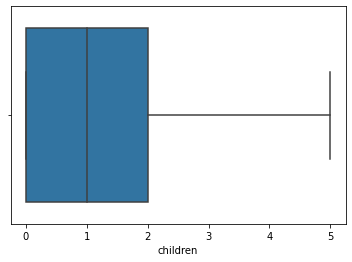

In [9]:
sns.boxplot(x=df["children"])

<AxesSubplot:xlabel='charges'>

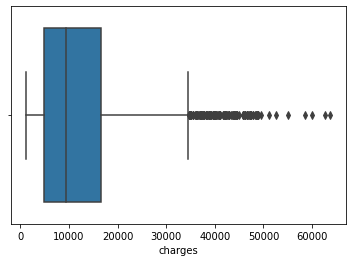

In [10]:
sns.boxplot(x=df["charges"])

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.00000
bmi             8.41000
children        2.00000
charges     11911.37345
dtype: float64


Identify frequency of variables

Text(0.5, 0, 'age')

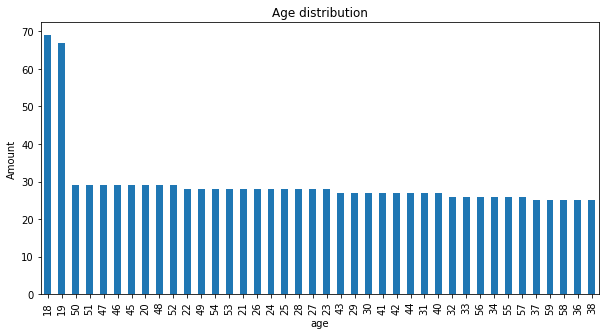

In [12]:
#plotting a Histogram
df.age.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Age distribution")
plt.ylabel("Amount")
plt.xlabel("age")

Text(0.5, 0, 'sex')

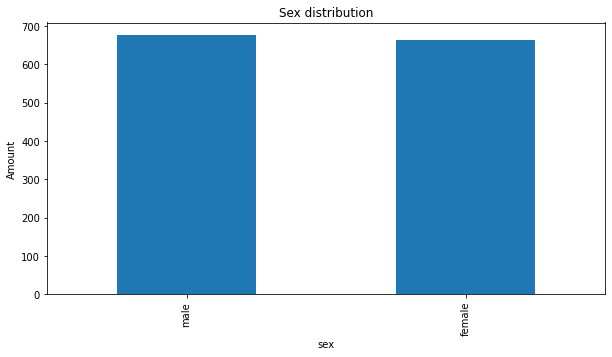

In [13]:
#plotting a Histogram
df.sex.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Sex distribution")
plt.ylabel("Amount")
plt.xlabel("sex")

Text(0.5, 0, 'smoker')

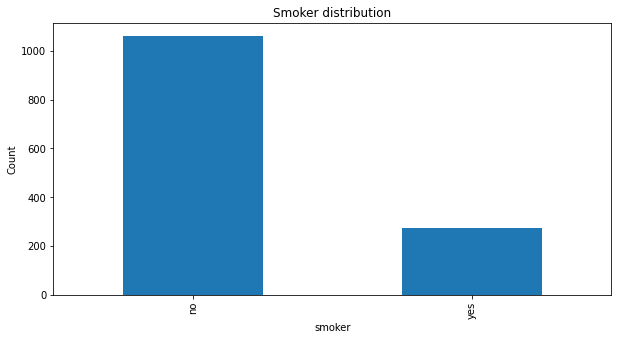

In [14]:
df.smoker.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Smoker distribution")
plt.ylabel("Count")
plt.xlabel("smoker")

Text(0.5, 0, 'children')

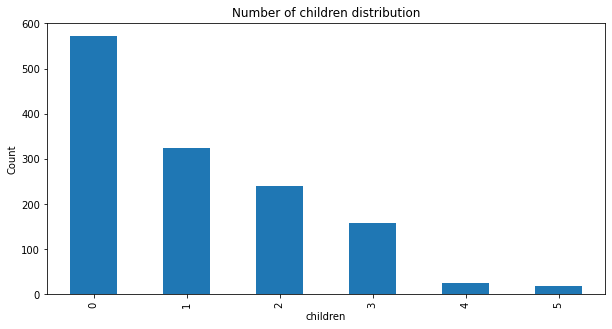

In [15]:
df.children.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of children distribution")
plt.ylabel("Count")
plt.xlabel("children")

Text(0.5, 0, 'region')

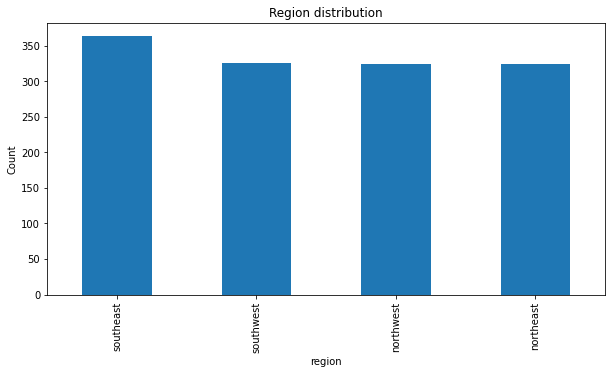

In [16]:
df.region.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Region distribution")
plt.ylabel("Count")
plt.xlabel("region")

Analyse dependencies between variables. Use heatmap in order find potential relationships between features.

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


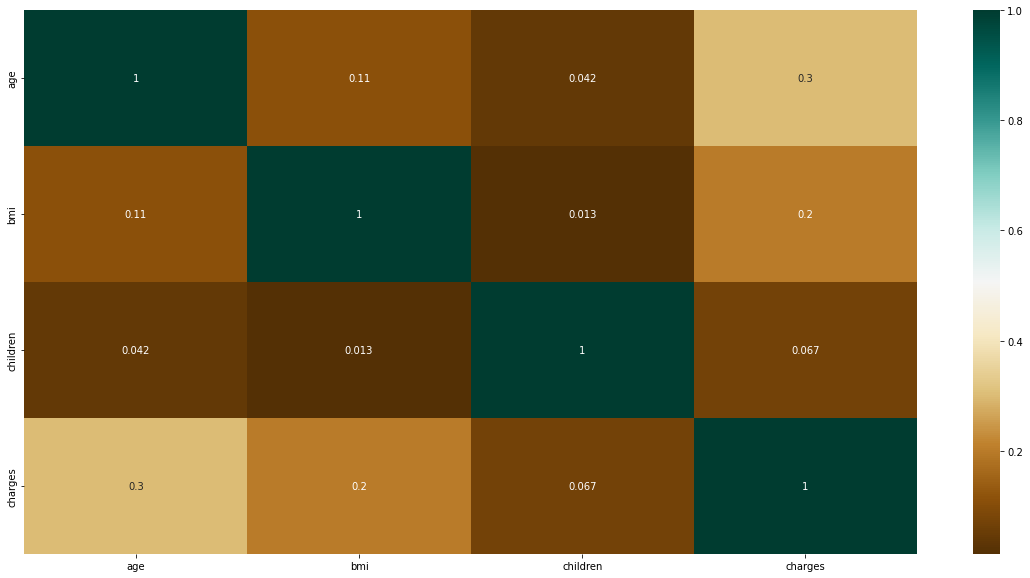

In [17]:
# Finding the relations between the variables
plt.figure(figsize=(20,10))
c = df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Analyze correlation between between charges and variables using a scatterplot and trendline

<AxesSubplot:xlabel='children', ylabel='charges'>

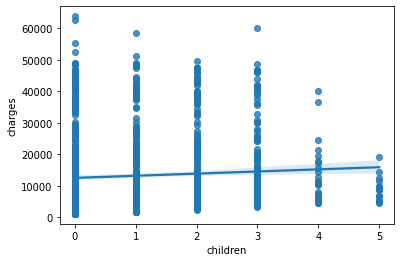

In [18]:
# Create a plot number of children and costs
sns.regplot(x="children", y="charges", data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

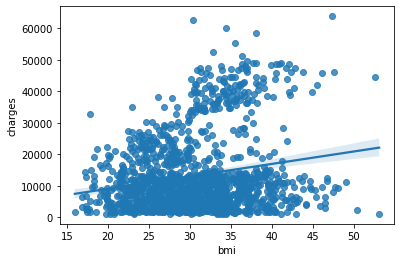

In [19]:
# Create a plot for bmi and cost
sns.regplot(x="bmi", y="charges", data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

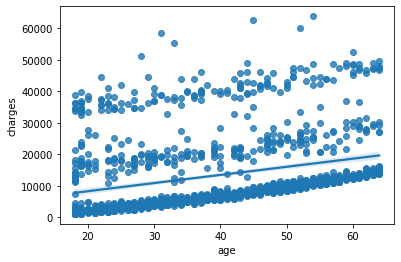

In [20]:
# Create a plot for age and charges
sns.regplot(x="age", y="charges", data=df)

Having completed these steps in our exploratory analysis, we want to create a k-means clustering model for two two-dimensional dataframes. The first will be containing the variables age and charges, whereas the second will be containing bmi and charges.

Model 1: Two dimensional dataframe for the variables age and charges

[[3.71431793e+01 6.43554892e+03]
 [4.03765432e+01 4.07613086e+04]
 [4.49756944e+01 1.88976443e+04]]


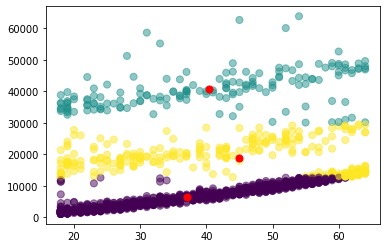

In [21]:
df_age = pd.DataFrame(df,columns=["age", "charges"])
df_age.tail()

# fit kmeans to dataframe
kmeans = KMeans(n_clusters=3).fit(df_age)
centroids = kmeans.cluster_centers_
print(centroids)

# Plot the fitting in a scatterplot
plt.scatter(df_age["age"], df_age["charges"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=50)
plt.show()

Model 2: Two dimensional dataframe for the variables BMI and charges.

[[2.91341883e+01 1.84857697e+04]
 [3.04253114e+01 6.29439028e+03]
 [3.48454321e+01 4.07613086e+04]]


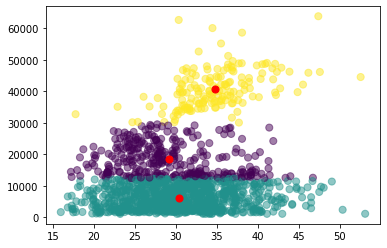

In [22]:
#Create a two dimensional dataframe
df_bmi = pd.DataFrame(df,columns=["bmi", "charges"])

# fit kmeans to dataframe
kmeans = KMeans(n_clusters=3).fit(df_bmi)
centroids = kmeans.cluster_centers_
print(centroids)

# Plot the fitting in a scatterplot
plt.scatter(df_bmi["bmi"], df_bmi["charges"], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=50)
plt.show()


In [23]:
# Select the subset data of each column in the dataframe and store them as variables
ages = df["age"]
print(ages)

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1337, dtype: int64


Alt nedenfor er KLADD!

In [24]:
# Calculate the average age of all individuals and store it as the variable average_age.
average_age = np.mean(ages)
print(average_age)

39.222139117427076


In [25]:
# Find unique values for regions
unique_regions = df.region.unique()
print(unique_regions)

['southwest' 'southeast' 'northwest' 'northeast']


For experimation only :)

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The columns in the dataset is age, sex, bmi, children, smoker, region and charges. Initially, I plotted the age frequency of customers.

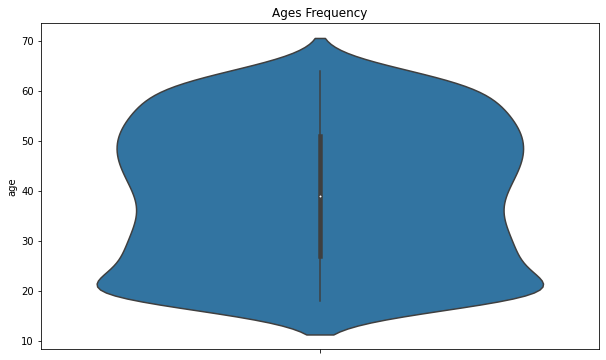

In [27]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["age"])
plt.show()

Having gained an understanding of the age frequency, I decided to create a box plot of cost and bmi to better understand the distribution range. The range of bmi is clearly more than the charges range.

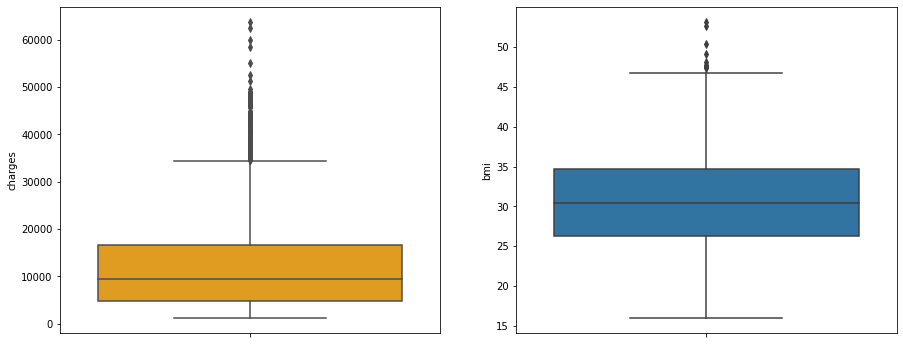

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["charges"], color="orange")
plt.subplot(1,2,2)
sns.boxplot(y=df["bmi"])
plt.show()

In addition to this I wanted to create a bar plot to visualize the distribution of male and female populaltion, and smokers and non-smokers.

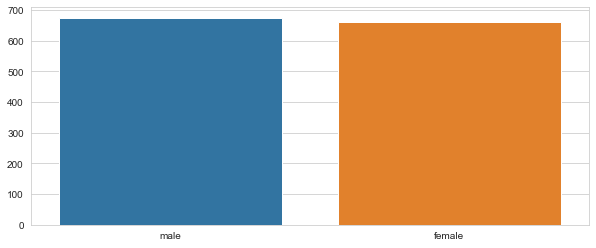

In [29]:
df_sex = df.sex.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.barplot(x=df_sex.index, y=df_sex.values)
plt.show()

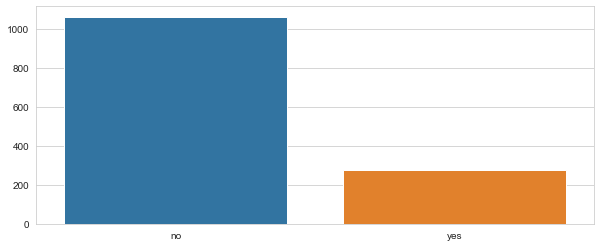

In [30]:
df_smoker = df.smoker.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.barplot(x=df_smoker.index, y=df_smoker.values)
plt.show()

Having done this, it is clear that the dataset might introduce bias to the analysis as the distribution shows a clear overweight of non-smokers. Nonetheless, we will not be working around this issue during this project.

Next, I decided to redistribute age across several age groups.

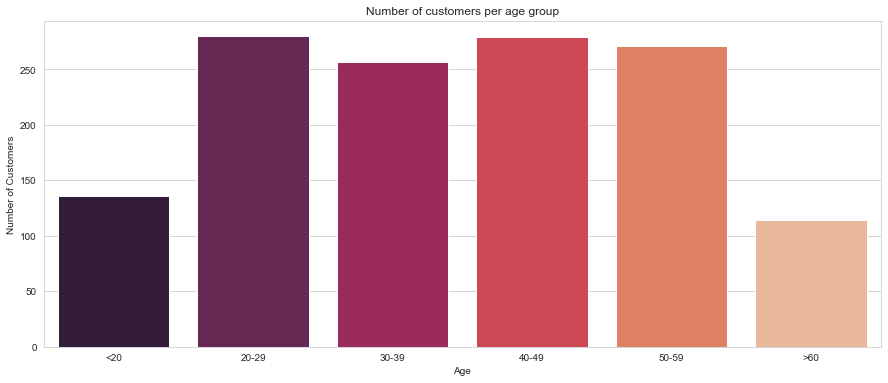

In [31]:
age20below = df.age[(df.age <= 19)]
age20_29 = df.age[(df.age <= 29) & (df.age >= 20)]
age30_39 = df.age[(df.age <= 39) & (df.age >= 30)]
age40_49 = df.age[(df.age <= 49) & (df.age >= 40)]
age50_59 = df.age[(df.age <= 59) & (df.age >= 50)]
age60above = df.age[df.age >= 60]

x = ["<20", "20-29", "30-39", "40-49", "50-59", ">60"]
y = [len(age20below.values),len(age20_29.values), len(age30_39.values), len(age40_49.values), len(age50_59.values), len(age60above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of customers per age group")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

Having done this, I wanted to do the same for charges. I decided to split these into segments per 10k bracket. Therefore, the brackets are the following:

- Spending bracket 1: Less than 10.000
- Spending bracket 2: More than or equal to 10.000 and less than 20.000
- Spending bracket 3: More than or equal to 20.000 and less than 30.000
- Spending bracket 4: More than or equal to 30.000 and less than 40.000
- Spending bracket 5: More than or equal to 40.000 and less than 50.000
- Spending bracket 6: More than or equal to 50.000

The majority of the customers are in the lower brackets and the amount of customers per bracket decreases as the charges get higher.

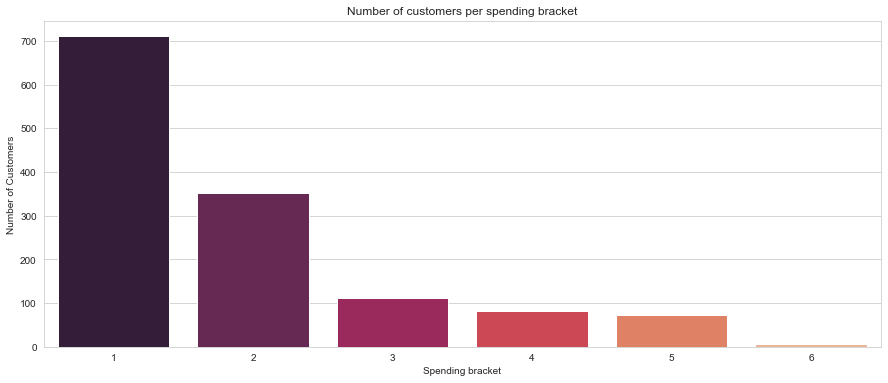

In [32]:
bracket1 = df.charges[(df.charges < 10000)]
bracket2 = df.charges[(df.charges <= 20000) & (df.charges >= 10000)]
bracket3 = df.charges[(df.charges <= 30000) & (df.charges >= 20000)]
bracket4 = df.charges[(df.charges <= 40000) & (df.charges >= 30000)]
bracket5 = df.charges[(df.charges <= 50000) & (df.charges >= 40000)]
bracket6 = df.charges[df.charges >= 50000]

x = ["1", "2", "3", "4", "5", "6"]
y = [bracket1.count(), bracket2.count(), bracket3.count(), bracket4.count(), bracket5.count(), bracket6.count()]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of customers per spending bracket")
plt.xlabel("Spending bracket")
plt.ylabel("Number of Customers")
plt.show()

I also did the same for BMI and identified that the majority of the customers have a BMI between 20 and 40.

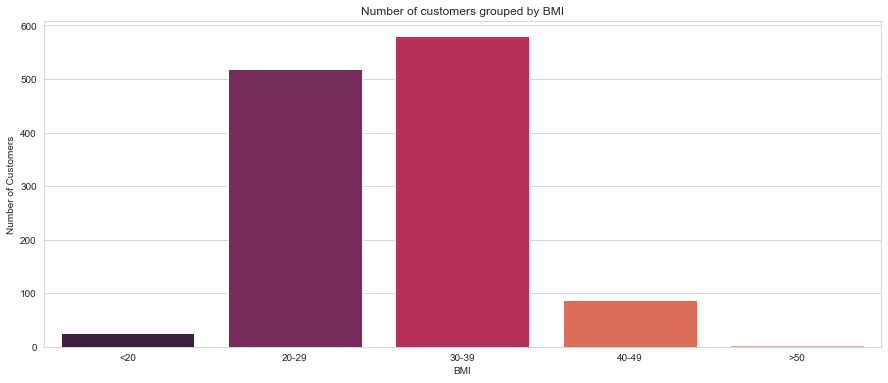

In [33]:
bmi20below = df.bmi[(df.bmi <= 19)]
bmi20_29 = df.bmi[(df.bmi <= 29) & (df.bmi >= 20)]
bmi30_39 = df.bmi[(df.bmi <= 39) & (df.bmi >= 30)]
bmi40_49 = df.bmi[(df.bmi <= 49) & (df.bmi >= 40)]
bmi50above = df.bmi[df.bmi >= 50]

x = ["<20", "20-29", "30-39", "40-49", ">50"]
y = [bmi20below.count(), bmi20_29.count(), bmi30_39.count(), bmi40_49.count(), bmi50above.count()]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of customers grouped by BMI")
plt.xlabel("BMI")
plt.ylabel("Number of Customers")
plt.show()

In order to continue with my analysis I had to transform the variables sex, smoker and region datatypes to bool and integers.

In [34]:
#Datatypes transformation function
df_region = df.region


Next, I plotted Within Cluster Sum of Squares

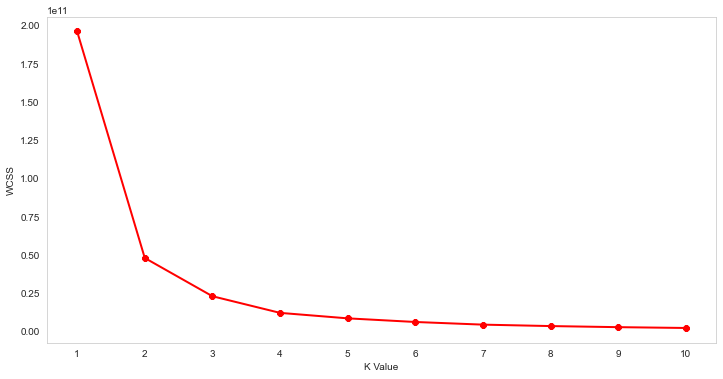

In [35]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,-1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object